# setup and EDA

## import libraries

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import flake8
import pycodestyle_magic
import pandas as pd
import random
import requests
import zipfile
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
print(tf.__version__)

2.5.0


## variables

In [20]:
Img_Size = 300 #keeping the resolition of all images to 150x150 to feed the neural network
Batch_size= 100
class_names = ['Horses', 'Humans']
train_dir = os.getcwd() + '\\data\\horse-or-human\\train'
val_dir = os.getcwd() + '\\data\\horse-or-human\\validation'
predict_images_dir = os.getcwd() + '\\data\\horse-or-human\\test_predict\\'
predict_images = ['sample1.png', 'sample2.png']
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

## methods

# obtain the data

In [17]:
arr_ = []
print(f'\nFolders in the {train_dir} directory :')
for i in  os.listdir(train_dir):
    print(f'{os.path.join(train_dir,i)}')
    arr_.append(i)
Train_Dir_humans = os.path.join(train_dir,arr_[0])
Train_Dir_horses = os.path.join(train_dir,arr_[1])
Num_humans_train = len(os.listdir(Train_Dir_humans))
Num_horses_train = len(os.listdir(Train_Dir_horses))

val_dir = os.getcwd() + '\\data\\horse-or-human\\validation'
print(f'\nFolders in the {val_dir} directory :')
for i in  os.listdir(val_dir):
    print(f'{os.path.join(val_dir,i)}')
Val_Dir_humans = os.path.join(val_dir,arr_[0])
Val_Dir_horses = os.path.join(val_dir,arr_[1])
Num_humans_val = len(os.listdir(Val_Dir_humans))
Num_horses_val = len(os.listdir(Val_Dir_horses))

Total_train_data=Num_humans_train + Num_horses_train
Total_val_data=Num_humans_val+Num_horses_val

print(f'\ntotal training human images: {Num_humans_train}')
print(f'total training horses images: {Num_horses_train}')
print(f'total validation human images: {Num_humans_val}')
print(f'total validation horses images: {Num_horses_val}')
print('added ...')
print(f'Total training images: {Total_train_data} : {round(Total_train_data/(Total_train_data+Total_val_data)*100,0)}%')
print(f'Total validation images: {Total_val_data} : {round(Total_val_data/(Total_train_data+Total_val_data)*100,0)}%')

train_horse_names = os.listdir(Train_Dir_horses)
print(f'\n{train_horse_names[:10]}')

train_human_names = os.listdir(Train_Dir_humans)
print(f'\n{train_human_names[:10]}')


Folders in the C:\Users\champ\Python_proj\ML_training_repo\TensorFlow_cert\data\horse-or-human\train directory :
C:\Users\champ\Python_proj\ML_training_repo\TensorFlow_cert\data\horse-or-human\train\horses
C:\Users\champ\Python_proj\ML_training_repo\TensorFlow_cert\data\horse-or-human\train\humans

Folders in the C:\Users\champ\Python_proj\ML_training_repo\TensorFlow_cert\data\horse-or-human\validation directory :
C:\Users\champ\Python_proj\ML_training_repo\TensorFlow_cert\data\horse-or-human\validation\horses
C:\Users\champ\Python_proj\ML_training_repo\TensorFlow_cert\data\horse-or-human\validation\humans

total training human images: 500
total training horses images: 527
total validation human images: 128
total validation horses images: 129
added ...
Total training images: 1027 : 80.0%
Total validation images: 257 : 20.0%

['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png',

## Explore the data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\champ\\Python_proj\\ML_training_repo\\TensorFlow_cert\\data\\horse-or-human\\train\\horses\\human01-00.png'

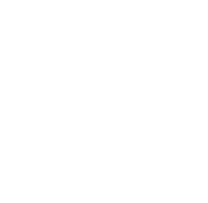

In [22]:
# # Set up matplotlib fig, and size it to fit 4x4 pics
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# next_horse_pix = [os.path.join(Train_Dir_humans, fname) 
#                 for fname in train_horse_names[pic_index-8:pic_index]]
# next_human_pix = [os.path.join(Train_Dir_horses, fname) 
#                 for fname in Train_Dir_horses[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_horse_pix+next_human_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

## Preprocess the data

In [ ]:
train_datagen=ImageDataGenerator(1./255) #rescale all images to 1/255
test_datagen=ImageDataGenerator(1./255)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size=(Img_Size,Img_Size),
                                                   batch_size=Batch_size,
                                                   class_mode='binary')
val_generator= test_datagen.flow_from_directory(val_dir,
                                                target_size=(Img_Size,Img_Size),
                                                batch_size=Batch_size,
                                                class_mode='binary')

## Build Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                           input_shape=(Img_Size, Img_Size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

## Compile model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model and fit the dataset

In [ ]:
history = model.fit(
      train_generator,
      validation_data = val_generator,  
      epochs=15,
      steps_per_epoch=8,
      validation_steps=8,
      verbose=1)

# Model predict from a new image

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing import image
for i in predict_images:
 
    # predicting images
    path = predict_images_dir + i
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a human")
    else:
        print(i + " is a horse")
 

In [ ]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}